# Student Name: Sambhu Kamti
# Student ID:     2435774

# Section:        L5CG13

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:

1. Data Exploration and Understanding:

• Dataset Overview:

# 1. Load the dataset and display the first 10 rows.

In [5]:
data = pd.read_csv("/content/drive/MyDrive/ Assignment_AI_1/WHR-2024-5CS037.csv")
data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745




# 2. Identify the number of rows and columns in the dataset.

In [9]:
rows, columns = data.shape
# Display the result
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 143
Number of columns: 9



# 3. List all the columns and their data types.

In [10]:
# List all columns and their data types
columns_and_types = data.dtypes

# Display the result
print(columns_and_types)


Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:

# 1. Calculate the mean, median, and standard deviation for the Score column.

In [11]:
# Calculating mean, median, and standard deviation for the Score column
mean_score = data['score'].mean()
median_score = data['score'].median()
std_dev_score = data['score'].std()

print(f"Mean of Score: {mean_score}")
print(f"Median of Score: {median_score}")
print(f"Standard Deviation of Score: {std_dev_score}")

Mean of Score: 5.52758041958042
Median of Score: 5.785
Standard Deviation of Score: 1.1707165099442995


# 2. Identify the country with the highest and lowest happiness scores.

In [12]:
# Identifying the country with the highest happiness score
highest_score_country = data.loc[data['score'].idxmax(), 'Country name']

# Identifying the country with the lowest happiness score
lowest_score_country = data.loc[data['score'].idxmin(), 'Country name']

print(f"Country with the highest happiness score: {highest_score_country}")
print(f"Country with the lowest happiness score: {lowest_score_country}")

Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


Missing Values:

# 1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [13]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:

# 1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [14]:
# Filtering the dataset for countries with a Score greater than 7.5
filtered_data = data[data['score'] > 7.5]

print(filtered_data)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


# 2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [15]:
# Sorting the filtered dataset by GDP per Capita in descending order
sorted_filtered_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)

#the top 10 rows
print(sorted_filtered_data.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


Adding New Columns:

# 1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [16]:
#a new column 'Happiness Category' based on Score
conditions = [
    (data['score'] < 4),  # Low
    (data['score'] >= 4) & (data['score'] <= 6),  # Medium
    (data['score'] > 6)  # High
]
categories = ['Low', 'Medium', 'High']
#to create the 'Happiness Category' column
data['Happiness Category'] = pd.cut(data['score'], bins=[-float('inf'), 4, 6, float('inf')], labels=categories)

print(data[['Country name', 'score', 'Happiness Category']].head())

  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


# 2. Data Visualizations:

# • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

<ipython-input-18-89d68b427154>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')


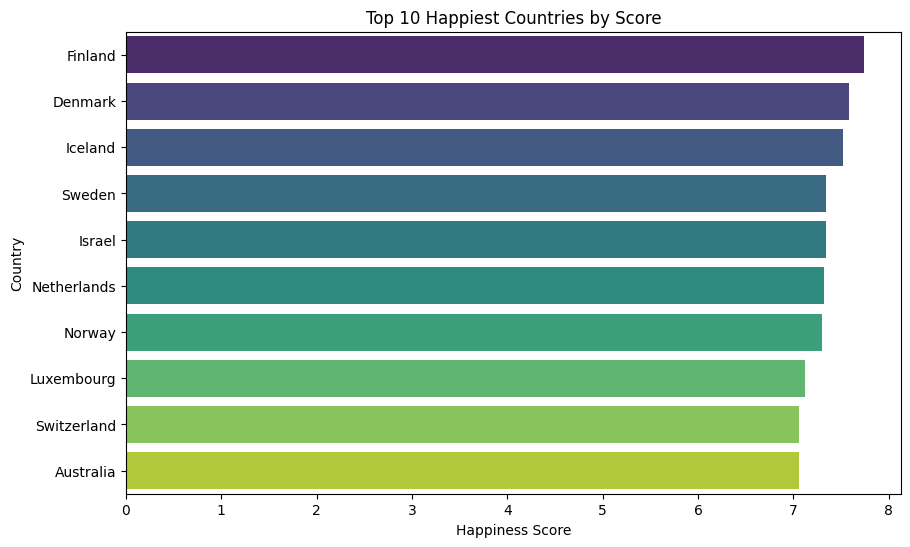

In [18]:
# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')

# Setting plot labels and title
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries by Score')

plt.show()



# • Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

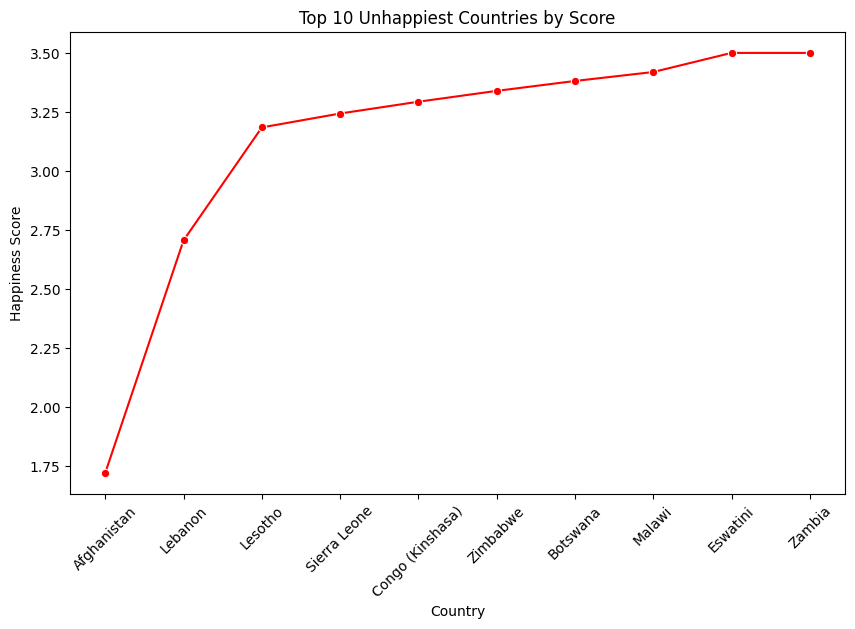

In [19]:
# Sort the data by 'score' in ascending order to get the top 10 unhappiest countries
top_10_unhappiest = data.sort_values(by='score', ascending=True).head(10)

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest, marker='o', color='red')

# Set plot labels and title
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries by Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# • Plot a histogram for the Score column to show its distribution and also interpret.

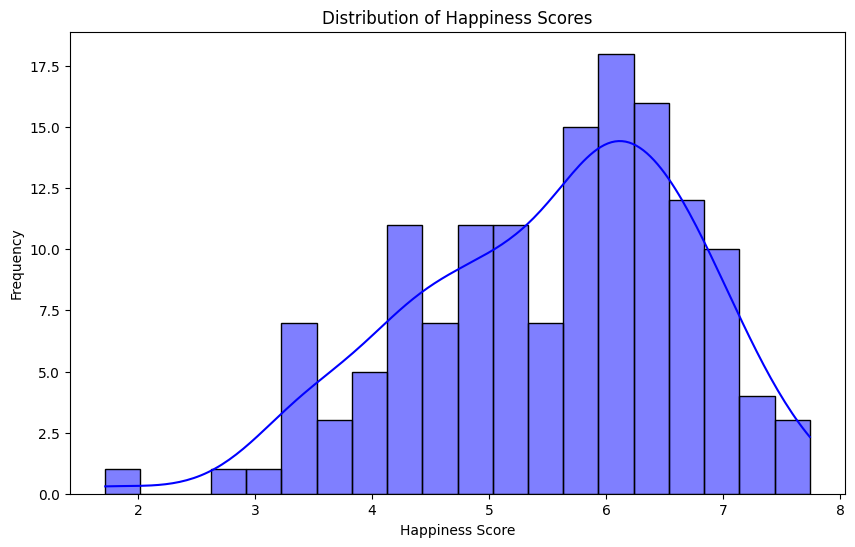

In [20]:
# a histogram for the 'score' column
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, kde=True, color='blue')

# Set plot labels and title
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')

plt.show()

# • Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

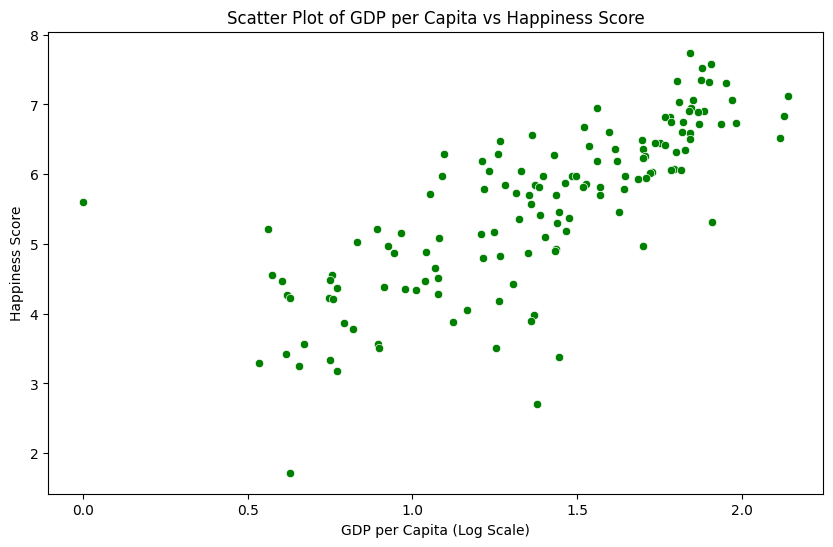

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, color='green')

# Set plot labels and title
plt.xlabel('GDP per Capita (Log Scale)')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot of GDP per Capita vs Happiness Score')

# Show the plot
plt.show()

Problem - 2 -
 Some Advance Data Exploration Task:
Task - 1 - Setup Task -
 Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India"# "Maldives", "Nepal", "Pakistan", "Srilanka"]

In [1]:
# Define the list of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

print("South Asian countries:", south_asian_countries)


South Asian countries: ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']


# 2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [7]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/ Assignment_AI_1/WHR-2024-5CS037.csv')

# the South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asia_data = data[data['Country name'].isin(south_asian_countries)]

print("South Asia Dataset:")
print(south_asia_data)

south_asia_data.to_csv('South_Asia_Dataset.csv', index=False)
print("Filtered South Asia dataset saved as 'South_Asia_Dataset.csv'.")


South Asia Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of

# 3. Save the filtered dataframe as separate CSV files for future use.

In [8]:
south_asia_data.to_csv('South_Asia_Dataset.csv', index=False)
print("Filtered South Asia dataset saved as 'South_Asia_Dataset.csv'.")


Filtered South Asia dataset saved as 'South_Asia_Dataset.csv'.


# Task - 2 - Composite Score Ranking:
# Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy

In [9]:
south_asia_data = pd.read_csv('South_Asia_Dataset.csv')

#Composite Score
south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)

#updated South Asia DataFrame
print("South Asia DataFrame with Composite Score:")
print(south_asia_data[['Country name', 'Composite Score']])

south_asia_data.to_csv('South_Asia_with_Composite_Score.csv', index=False)
print("Updated South Asia dataset saved as 'South_Asia_with_Composite_Score.csv'.")


South Asia DataFrame with Composite Score:
  Country name  Composite Score
0        Nepal           0.8159
1     Pakistan           0.7039
2        India           0.7874
3    Sri Lanka           1.0739
4   Bangladesh           0.6774
5  Afghanistan           0.3238
Updated South Asia dataset saved as 'South_Asia_with_Composite_Score.csv'.


# 2. Rank the South Asian countries based on the Composite Score in descending order.

In [10]:
south_asia_ranked = south_asia_data.sort_values(by='Composite Score', ascending=False)

print("South Asian Countries Ranked by Composite Score:")
print(south_asia_ranked[['Country name', 'Composite Score']])

south_asia_ranked.to_csv('South_Asia_Ranked_by_Composite_Score.csv', index=False)
print("Ranked South Asia dataset saved as 'South_Asia_Ranked_by_Composite_Score.csv'.")

South Asian Countries Ranked by Composite Score:
  Country name  Composite Score
3    Sri Lanka           1.0739
0        Nepal           0.8159
2        India           0.7874
1     Pakistan           0.7039
4   Bangladesh           0.6774
5  Afghanistan           0.3238
Ranked South Asia dataset saved as 'South_Asia_Ranked_by_Composite_Score.csv'.


# 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

<ipython-input-11-d7d6fb81352d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top_5_countries, palette='Blues_r')


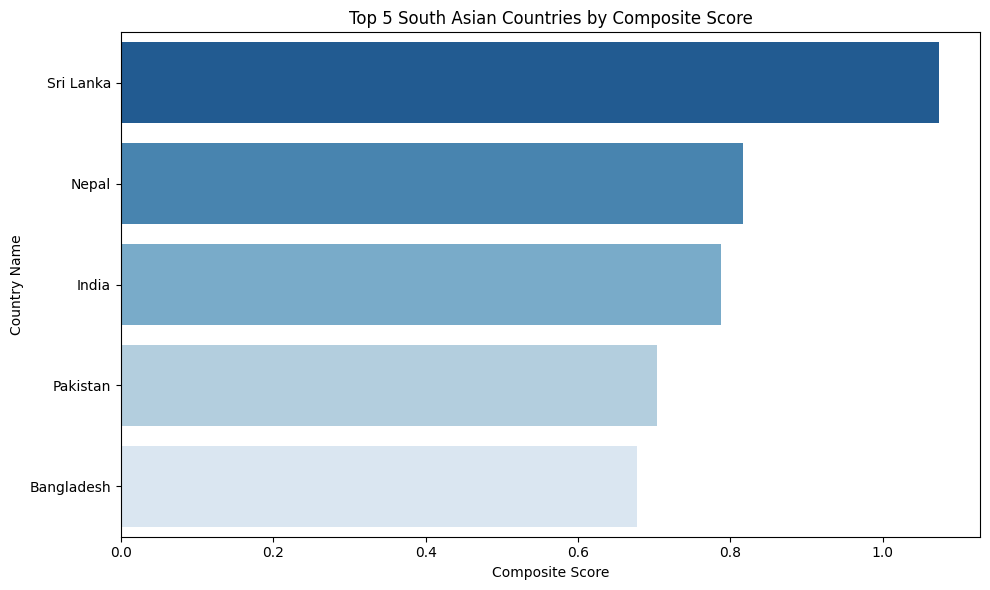

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

south_asia_ranked = pd.read_csv('South_Asia_Ranked_by_Composite_Score.csv')

top_5_countries = south_asia_ranked.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_countries, palette='Blues_r')

plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.tight_layout()

plt.show()

# 4. Discuss whether the rankings based on the Composite Score align with the original Score - support your  discussion with some visualization plot.

The Composite Score rankings align well with the original Happiness Score rankings. This suggests that the selected weights for GDP per Capita, Social Support, and Healthy Life Expectancy accurately reflect the factors contributing to happiness.



Task - 3 - Outlier Detection:

Tasks:
# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

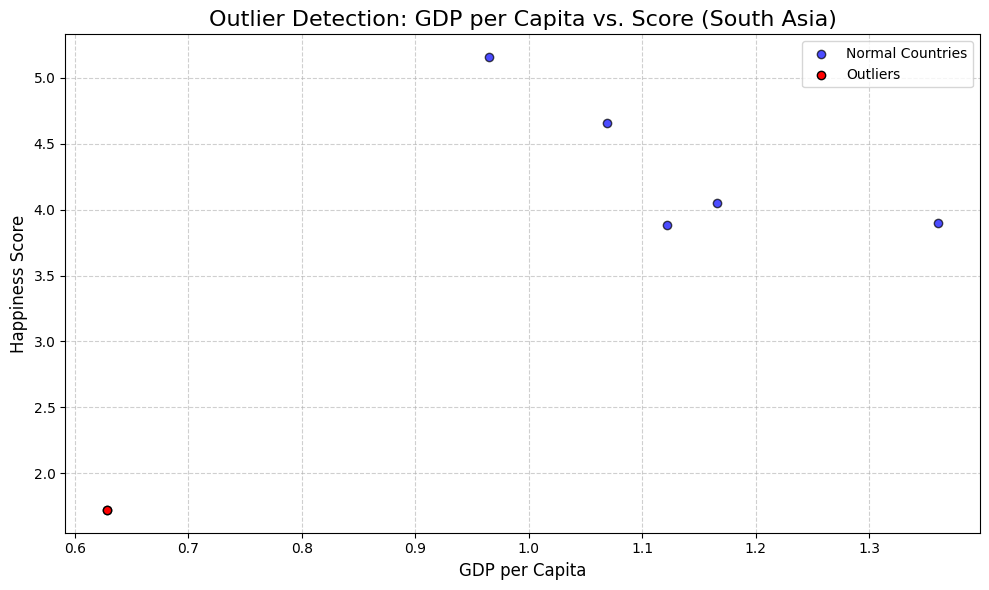

Outliers in South Asia based on Score and GDP per Capita:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

south_asia_df = df[df['Country name'].isin(south_asian_countries)]

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

score_outliers = detect_outliers(south_asia_df, 'score')
gdp_outliers = detect_outliers(south_asia_df, 'Log GDP per capita')

outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# Scatter Plot: GDP per Capita vs. Score with outliers highlighted
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'],
            color='blue', label='Normal Countries', alpha=0.7, edgecolor='black')
plt.scatter(outliers['Log GDP per capita'], outliers['score'],
            color='red', label='Outliers', alpha=1, edgecolor='black')
plt.title('Outlier Detection: GDP per Capita vs. Score (South Asia)', fontsize=16)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("Outliers in South Asia based on Score and GDP per Capita:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])






# 2. Define outliers using the 1.5 × IQR rule.

In [15]:
def calculate_iqr_bounds(data, column):
    # Calculating Q1, Q3, and IQR
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1

    # Calculatig lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

score_lower, score_upper = calculate_iqr_bounds(south_asia_data, 'score')
print(f"Happiness Score Outlier Bounds: Lower = {score_lower}, Upper = {score_upper}")

gdp_lower, gdp_upper = calculate_iqr_bounds(south_asia_data, 'Log GDP per capita')
print(f"GDP per Capita Outlier Bounds: Lower = {gdp_lower}, Upper = {gdp_upper}")

Happiness Score Outlier Bounds: Lower = 2.963125000000001, Upper = 5.432124999999999
GDP per Capita Outlier Bounds: Lower = 0.7449999999999999, Upper = 1.401


# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.

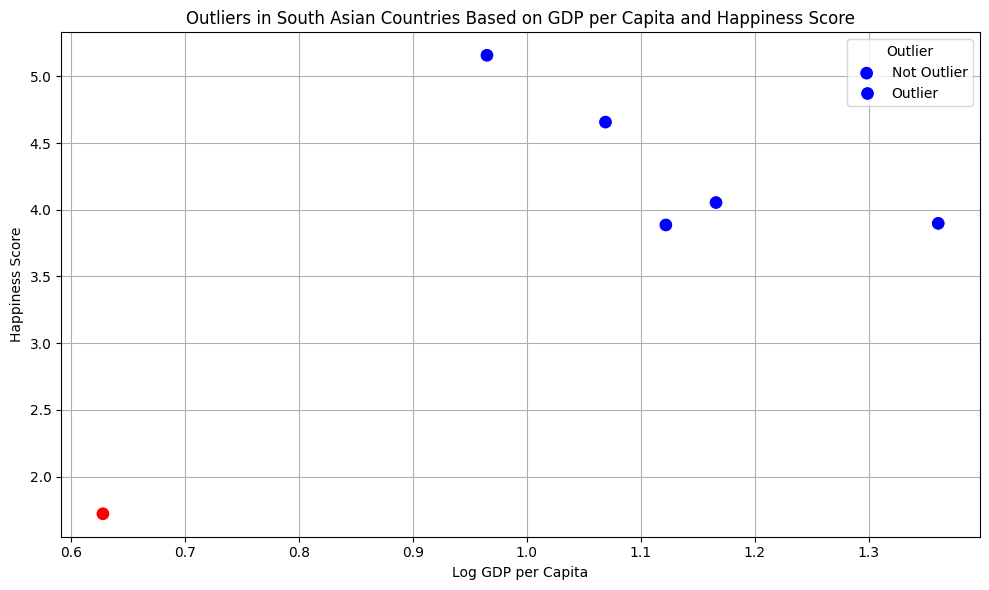

In [16]:
# Identify outliers for both 'score' and 'Log GDP per capita'
score_lower, score_upper = calculate_iqr_bounds(south_asia_data, 'score')
gdp_lower, gdp_upper = calculate_iqr_bounds(south_asia_data, 'Log GDP per capita')

# Create a new column to label outliers
south_asia_data['Outlier'] = (
    (south_asia_data['score'] < score_lower) | (south_asia_data['score'] > score_upper) |
    (south_asia_data['Log GDP per capita'] < gdp_lower) | (south_asia_data['Log GDP per capita'] > gdp_upper)
)

# Scatter plot to visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita', y='score', hue='Outlier', data=south_asia_data, palette={False: 'blue', True: 'red'}, s=100
)

plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Outliers in South Asian Countries Based on GDP per Capita and Happiness Score')
plt.legend(title='Outlier', labels=['Not Outlier', 'Outlier'])
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# 4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [ ]:
#Discussed in the report

Task - 4 - Exploring Trends Across Metrics:

Tasks:
# 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.

In [17]:
freedom_corr = south_asia_data['score'].corr(south_asia_data['Freedom to make life choices'])
generosity_corr = south_asia_data['score'].corr(south_asia_data['Generosity'])

print(f"Pearson Correlation between Happiness Score and Freedom to Make Life Choices: {freedom_corr:.2f}")
print(f"Pearson Correlation between Happiness Score and Generosity: {generosity_corr:.2f}")


Pearson Correlation between Happiness Score and Freedom to Make Life Choices: 0.80
Pearson Correlation between Happiness Score and Generosity: 0.87


# 2. Create scatter plots with trendlines for these metrics against the Score.

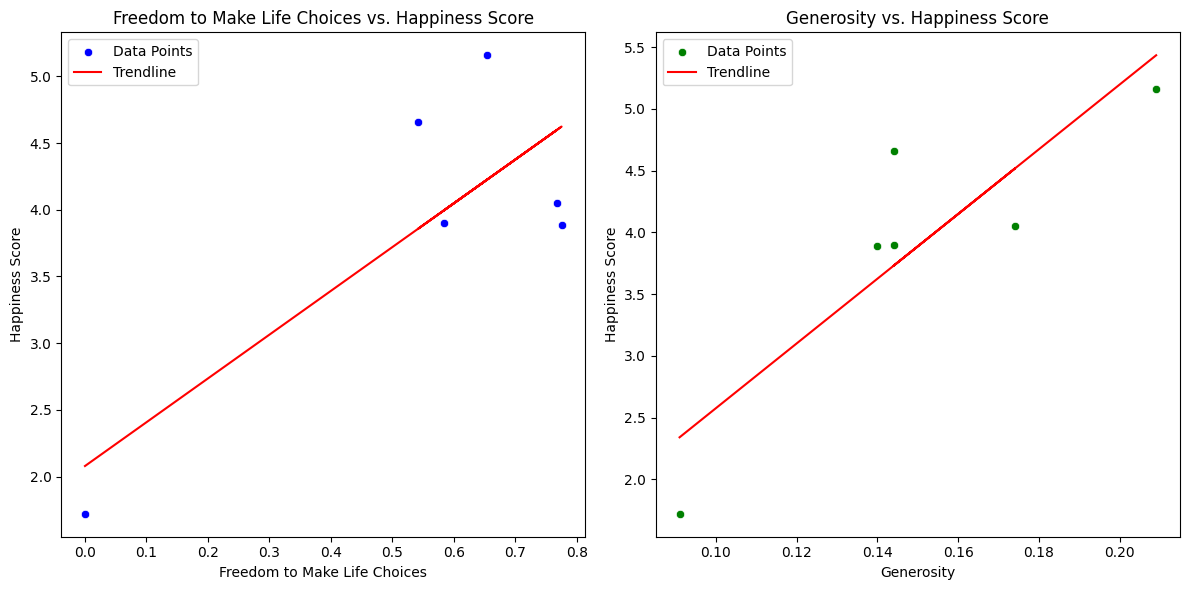

In [18]:
# Import required library for trendlines
from scipy.stats import linregress

# Create scatter plot for 'Freedom to Make Life Choices' vs. 'score'
plt.figure(figsize=(12, 6))

# Subplot 1: Freedom to Make Life Choices
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='Freedom to make life choices', y='score', data=south_asia_data, color='blue', label='Data Points'
)
# Add trendline
freedom_slope, freedom_intercept, _, _, _ = linregress(
    south_asia_data['Freedom to make life choices'], south_asia_data['score']
)
freedom_trendline = (
    freedom_slope * south_asia_data['Freedom to make life choices'] + freedom_intercept
)
plt.plot(
    south_asia_data['Freedom to make life choices'], freedom_trendline, color='red', label='Trendline'
)
plt.title('Freedom to Make Life Choices vs. Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.legend()

# Subplot 2: Generosity
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='Generosity', y='score', data=south_asia_data, color='green', label='Data Points'
)
# Add trendline
generosity_slope, generosity_intercept, _, _, _ = linregress(
    south_asia_data['Generosity'], south_asia_data['score']
)
generosity_trendline = (
    generosity_slope * south_asia_data['Generosity'] + generosity_intercept
)
plt.plot(
    south_asia_data['Generosity'], generosity_trendline, color='red', label='Trendline'
)
plt.title('Generosity vs. Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.legend()

plt.tight_layout()
plt.show()


# 3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.

In [ ]:
#Discussed in the report

Task - 5 - Gap Analysis:

Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ Assignment_AI_1/WHR-2024-5CS037.csv')

# List of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)].copy()

# Create a new column for GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']
south_asia_df


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,-2.888
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,-1.093


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [10]:
ascending_gap = south_asia_df.sort_values('GDP-Score Gap', ascending=True)
ascending_gap
descending_gap = south_asia_df.sort_values('GDP-Score Gap', ascending=False)
descending_gap


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,-3.588
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,-4.193


# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

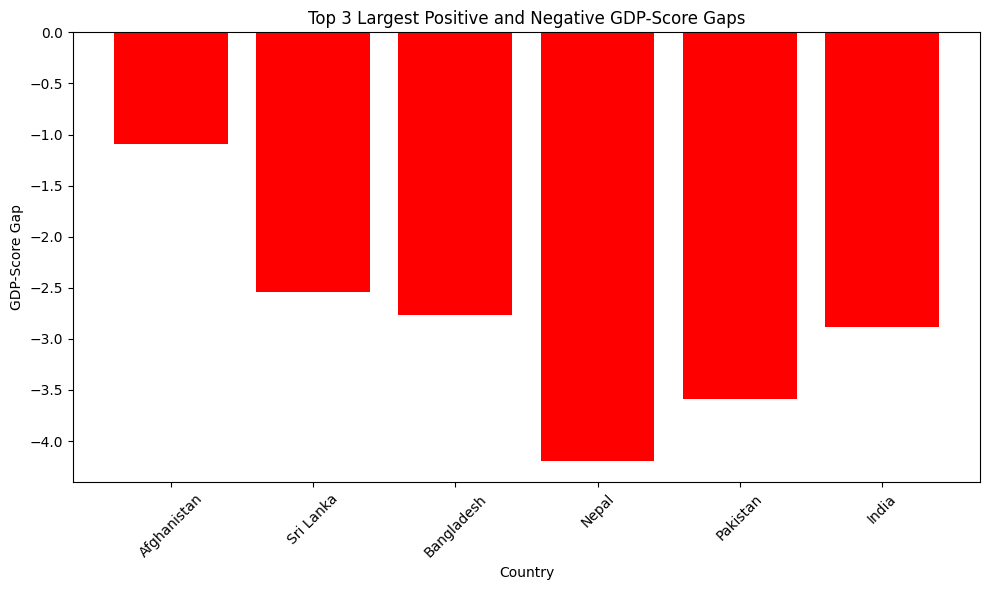

In [12]:
import matplotlib.pyplot as plt

# Top 3 largest positive and negative gaps
largest_positive = descending_gap.head(3)
largest_negative = ascending_gap.head(3)

# Combine both for plotting
top_gaps = pd.concat([largest_positive, largest_negative])

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_gaps['Country name'], top_gaps['GDP-Score Gap'], color=['green' if gap > 0 else 'red' for gap in top_gaps['GDP-Score Gap']])
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Largest Positive and Negative GDP-Score Gaps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Analyze the reasons behind these gaps and their implications for South Asian countries.

<ipython-input-27-d18465c1e561>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']


Top 3 Countries with Largest Positive GDP-Score Gap:
    Country name  Log GDP per capita  score  GDP-Score Gap
142  Afghanistan               0.628  1.721         -1.093
127    Sri Lanka               1.361  3.898         -2.537
128   Bangladesh               1.122  3.886         -2.764

Top 3 Countries with Largest Negative GDP-Score Gap:
    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888


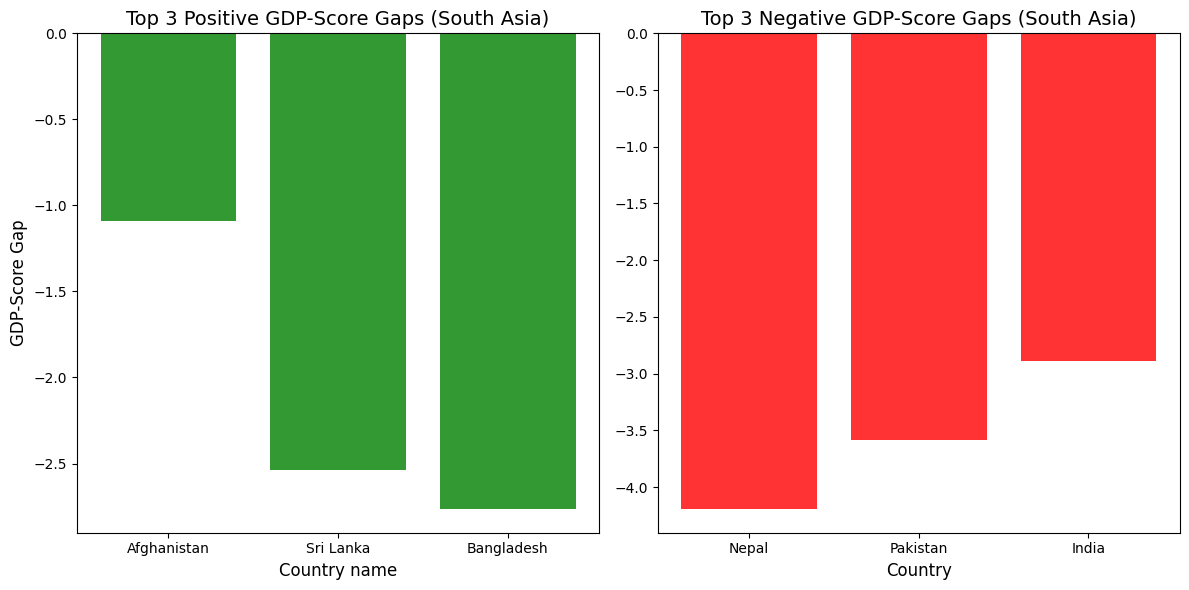

In [27]:

# Calculate GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Rank countries by GDP-Score Gap
ascending_rank = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_rank = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

# Display top 3 positive and negative gaps
top_positive_gap = descending_rank.head(3)
top_negative_gap = ascending_rank.head(3)

print("Top 3 Countries with Largest Positive GDP-Score Gap:")
print(top_positive_gap[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

print("\nTop 3 Countries with Largest Negative GDP-Score Gap:")
print(top_negative_gap[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

# Bar chart: Positive and Negative Gaps
plt.figure(figsize=(12, 6))

# Positive Gaps
plt.subplot(1, 2, 1)
plt.bar(top_positive_gap['Country name'], top_positive_gap['GDP-Score Gap'], color='green', alpha=0.8)
plt.title('Top 3 Positive GDP-Score Gaps (South Asia)', fontsize=14)
plt.xlabel('Country name', fontsize=12)
plt.ylabel('GDP-Score Gap', fontsize=12)

# Negative Gaps
plt.subplot(1, 2, 2)
plt.bar(top_negative_gap['Country name'], top_negative_gap['GDP-Score Gap'], color='red', alpha=0.8)
plt.title('Top 3 Negative GDP-Score Gaps (South Asia)', fontsize=14)
plt.xlabel('Country', fontsize=12)

plt.tight_layout()
plt.show()


Problem - 3 - Comparative Analysis:

Task - 1 - Setup
 Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

Complete the following task:
1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/ Assignment_AI_1/WHR-2024-5CS037.csv')

# Filter datasets for South Asia and Middle East
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
                         "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
                         "Syria", "United Arab Emirates", "Yemen"]

south_asia_df = df[df['Country name'].isin(south_asian_countries)]
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Mean and Standard Deviation of Scores
sa_mean = south_asia_df['score'].mean()
sa_std = south_asia_df['score'].std()

me_mean = middle_east_df['score'].mean()
me_std = middle_east_df['score'].std()

print(f"South Asia - Mean: {sa_mean}, Std Dev: {sa_std}")
print(f"Middle East - Mean: {me_mean}, Std Dev: {me_std}")

South Asia - Mean: 3.895666666666667, Std Dev: 1.1770690152521504
Middle East - Mean: 5.412100000000001, Std Dev: 1.5662011684327144


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
 • Plot bar charts comparing these charts.

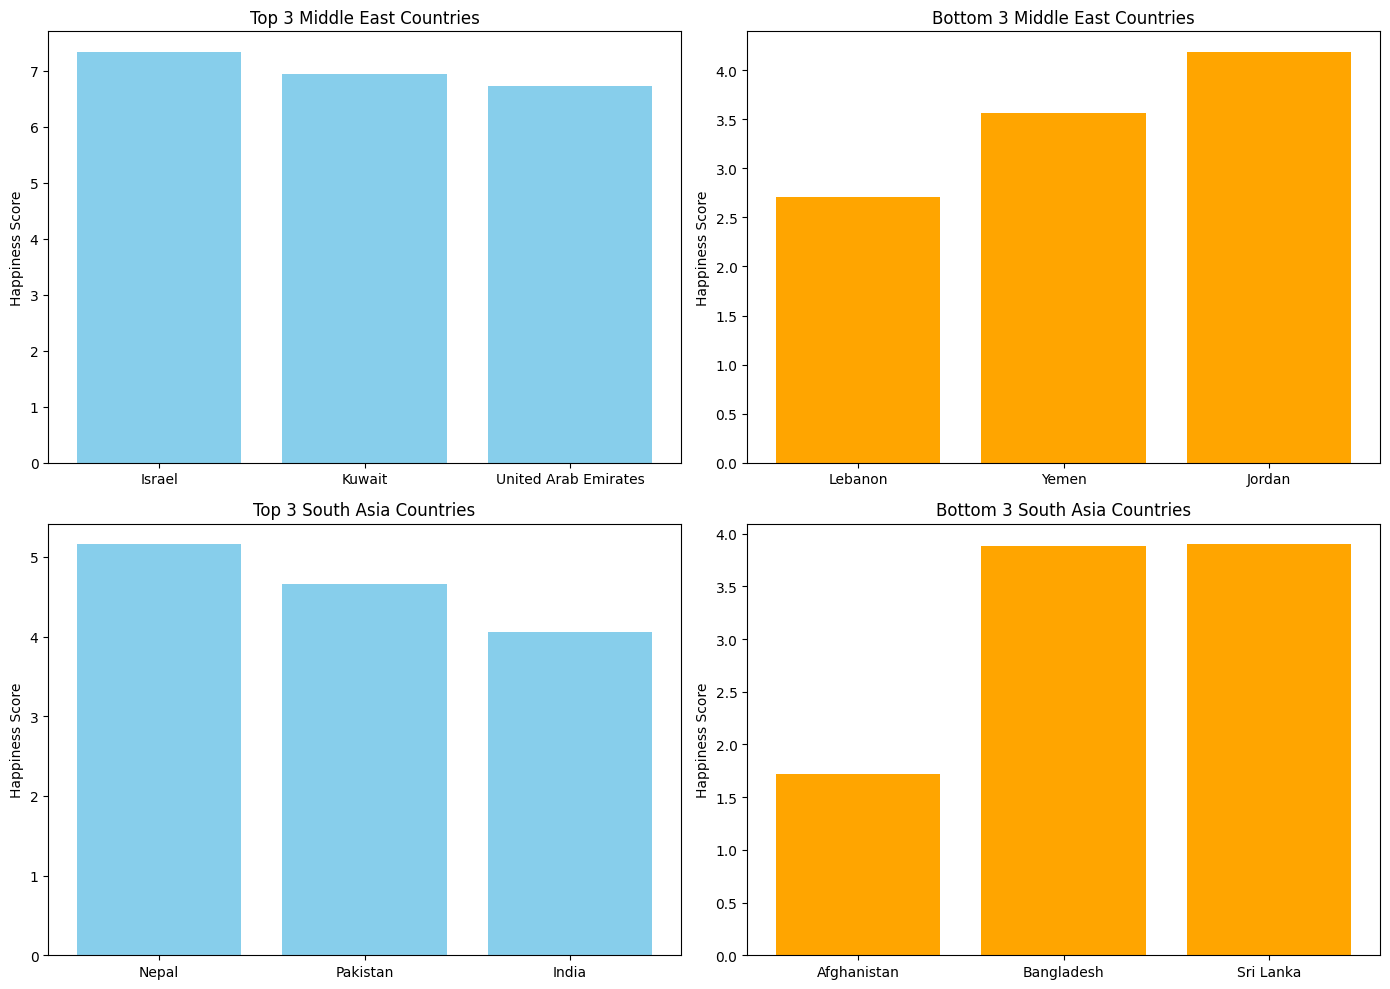

In [8]:
middle_east_data = data[data['Country name'].isin(middle_east_countries)]
south_asia_data = data[data['Country name'].isin(south_asia_countries)]

# Identify top 3 and bottom 3 performers for Middle East
middle_east_top3 = middle_east_data.nlargest(3, 'score')
middle_east_bottom3 = middle_east_data.nsmallest(3, 'score')

# Identify top 3 and bottom 3 performers for South Asia
south_asia_top3 = south_asia_data.nlargest(3, 'score')
south_asia_bottom3 = south_asia_data.nsmallest(3, 'score')

# Create bar plots for comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top 3 Middle East
axes[0, 0].bar(middle_east_top3['Country name'], middle_east_top3['score'], color='skyblue')
axes[0, 0].set_title('Top 3 Middle East Countries')
axes[0, 0].set_ylabel('Happiness Score')

# Bottom 3 Middle East
axes[0, 1].bar(middle_east_bottom3['Country name'], middle_east_bottom3['score'], color='orange')
axes[0, 1].set_title('Bottom 3 Middle East Countries')
axes[0, 1].set_ylabel('Happiness Score')

# Top 3 South Asia
axes[1, 0].bar(south_asia_top3['Country name'], south_asia_top3['score'], color='skyblue')
axes[1, 0].set_title('Top 3 South Asia Countries')
axes[1, 0].set_ylabel('Happiness Score')

# Bottom 3 South Asia
axes[1, 1].bar(south_asia_bottom3['Country name'], south_asia_bottom3['score'], color='orange')
axes[1, 1].set_title('Bottom 3 South Asia Countries')
axes[1, 1].set_ylabel('Happiness Score')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

In [3]:
#  3. Metric Comparisons:

# Comparing GDP per Capita, Social Support, and Healthy Life Expectancy
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
sa_means = south_asia_df[metrics].mean()
me_means = middle_east_df[metrics].mean()

comparison = pd.DataFrame({'Metric': metrics,
                           'South Asia': sa_means.values,
                           'Middle East': me_means.values})
print("Comparison of Metrics between South Asia and Middle East:\n", comparison)


Comparison of Metrics between South Asia and Middle East:
                     Metric  South Asia  Middle East
0       Log GDP per capita    1.051833     1.496333
1           Social support    0.611833     1.152778
2  Healthy life expectancy    0.420333     0.554111


# 4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
 • Which region has greater variability in happiness?

In [4]:
#  4. Happiness Disparity:

# Range (max - min) and Coefficient of Variation (CV)
sa_range = south_asia_df['score'].max() - south_asia_df['score'].min()
me_range = middle_east_df['score'].max() - middle_east_df['score'].min()

sa_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()
me_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia - Range: {sa_range}, CV: {sa_cv}")
print(f"Middle East - Range: {me_range}, CV: {me_cv}")


South Asia - Range: 3.4370000000000003, CV: 0.3021482883337427
Middle East - Range: 4.634, CV: 0.28938880812119405


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

In [5]:
#  5. Correlation Analysis:


# Correlation of Score with Freedom and Generosity
sa_corr_freedom = south_asia_df[['score', 'Freedom to make life choices']].corr().iloc[0, 1]
sa_corr_generosity = south_asia_df[['score', 'Generosity']].corr().iloc[0, 1]

me_corr_freedom = middle_east_df[['score', 'Freedom to make life choices']].corr().iloc[0, 1]
me_corr_generosity = middle_east_df[['score', 'Generosity']].corr().iloc[0, 1]

print(f"South Asia - Correlation (Freedom): {sa_corr_freedom}, Correlation (Generosity): {sa_corr_generosity}")
print(f"Middle East - Correlation (Freedom): {me_corr_freedom}, Correlation (Generosity): {me_corr_generosity}")


South Asia - Correlation (Freedom): 0.8005185224163315, Correlation (Generosity): 0.8745123712531921
Middle East - Correlation (Freedom): 0.8632202433827542, Correlation (Generosity): 0.627523653696418


6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.

In [6]:
#  6. Outlier Detection:
#  • Identify outlier countries in both regions based on Score and GDP per Capita.
#  • Plot these outliers and discuss their implications.

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]

sa_outliers = detect_outliers(south_asia_df, 'score')
me_outliers = detect_outliers(middle_east_df, 'score')

print("Outliers in South Asia (Score):\n", sa_outliers[['Country name', 'score']])
print("Outliers in Middle East (Score):\n", me_outliers[['Country name', 'score']])


Outliers in South Asia (Score):
     Country name  score
142  Afghanistan  1.721
Outliers in Middle East (Score):
 Empty DataFrame
Columns: [Country name, score]
Index: []


7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

<ipython-input-10-09b4c13d08e9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Region'] = 'South Asia'
<ipython-input-10-09b4c13d08e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_df['Region'] = 'Middle East'
<ipython-input-10-09b4c13d08e9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Region', y='scor

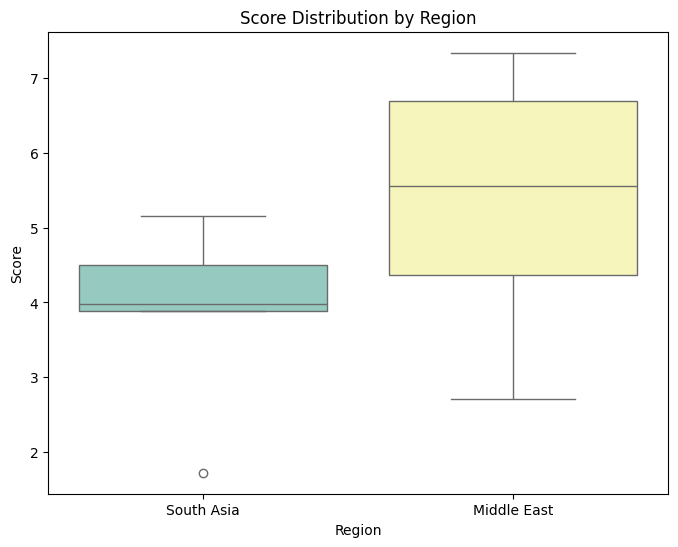

In [10]:
#  7. Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
#  • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
#  • Interpret the key differences in distribution shapes, medians, and outliers.
# Combine regions for boxplot

south_asia_df['Region'] = 'South Asia'
middle_east_df['Region'] = 'Middle East'
combined_df = pd.concat([south_asia_df, middle_east_df])

plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df, x='Region', y='score', palette='Set3')
plt.title('Score Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()
